In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/car_models_data.csv')
print(data.shape)
data.head()

(227, 6)


,brand_name,model_name,starting_price,body_type,engine-cc,mileage
0,Maruti,Alto 800,₹ 2.94 Lakh*,Hatchback,796.0,31.59
1,Maruti,Alto K10,₹ 3.17 Lakh*,Hatchback,998.0,32.26
2,Maruti,S-Presso,₹ 3.7 Lakh*,Hatchback,998.0,21.70
3,Maruti,Eeco,₹ 3.8 Lakh*,Minivans,1196.0,21.94
4,Maruti,Celerio,₹ 4.41 Lakh*,Hatchback,998.0,21.63


In [3]:
data.columns

Index(['brand_name', 'model_name', 'starting_price', 'body_type', 'engine-cc',
       'mileage'],
      dtype='object')

In [4]:
data.isnull().any()

brand_name        False
model_name        False
starting_price    False
body_type         False
engine-cc          True
mileage           False
dtype: bool

In [5]:
data[data.isnull().any(1)]

,brand_name,model_name,starting_price,body_type,engine-cc,mileage
28,Hyundai,Kona Electric,₹ 23.71 Lakh*,SUV,NaN,0.0
47,Tata,Tigor EV,₹ 9.17 Lakh*,Sedans,NaN,0.0
51,Tata,Nexon EV,₹ 13.99 Lakh*,SUV,NaN,0.0
53,Mahindra,e2oPlus,₹ 6.07 Lakh*,Hatchback,NaN,110.0
60,Mahindra,E Verito,₹ 9.12 Lakh*,Sedans,NaN,0.0
100,MG,ZS EV,₹ 20.88 Lakh*,SUV,NaN,0.0


In [6]:
data = data.dropna()

In [7]:
data.shape

(221, 6)

<h1>Clean Data</h1>

In [8]:
import re

def get_cleaned_price(raw_price):
    m = re.search(r"[-+]?\d*\.?\d+|\d+", raw_price)
    group = m.group()
    return float(group) if 'Lakh' in raw_price else float(group) * 100

print(get_cleaned_price("₹ 23.71 Lakh*"))
print(get_cleaned_price("₹ 2.71 Cr*"))

23.71
271.0


In [9]:
data['starting_price'] = data['starting_price'].apply(lambda raw_price : get_cleaned_price(raw_price))
data.head()

,brand_name,model_name,starting_price,body_type,engine-cc,mileage
0,Maruti,Alto 800,2.94,Hatchback,796.0,31.59
1,Maruti,Alto K10,3.17,Hatchback,998.0,32.26
2,Maruti,S-Presso,3.70,Hatchback,998.0,21.70
3,Maruti,Eeco,3.80,Minivans,1196.0,21.94
4,Maruti,Celerio,4.41,Hatchback,998.0,21.63


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.distplot(data['starting_price']);

In [11]:
def get_label_for_price(price):
    if price < 5:
        return 'EconomicalRange'
    elif 5 < price < 8:
        return 'MidRange'
    elif 8 < price < 14:
        return 'HighRange'
    elif 14 < price < 22:
        return 'VeryHighRange'
    elif 22 < price < 40:
        return 'Luxry'
    elif 40 < price < 80:
        return 'HighLuxry'
    return 'UltimateLuxry'

In [12]:
data['segment'] = data['starting_price'].apply(lambda price : get_label_for_price(price))
data.tail(10)

,brand_name,model_name,starting_price,body_type,engine-cc,mileage,segment
217,Mini,Countryman,37.4,Hatchback,1998.0,16.60,Luxry
218,Mini,Cooper Convertible,38.9,Convertibles,1998.0,16.70,Luxry
219,Mini,Clubman,41.2,Hatchback,1998.0,13.79,HighLuxry
220,Aston Martin,Rapide,329.0,Sedans,5935.0,10.90,UltimateLuxry
221,Aston Martin,DB11,397.0,Coupe,5204.0,6.00,UltimateLuxry
222,Maserati,Ghibli,135.0,Sedans,2987.0,16.94,UltimateLuxry
223,Maserati,Levante,149.0,SUV,2979.0,12.00,UltimateLuxry
224,Maserati,Quattroporte,171.0,Sedans,3799.0,11.76,UltimateLuxry
225,Maserati,GranTurismo,225.0,Coupe,4691.0,10.00,UltimateLuxry
226,Maserati,GranCabrio,246.0,Convertibles,4691.0,10.20,UltimateLuxry


Text(0, 0.5, 'samples')

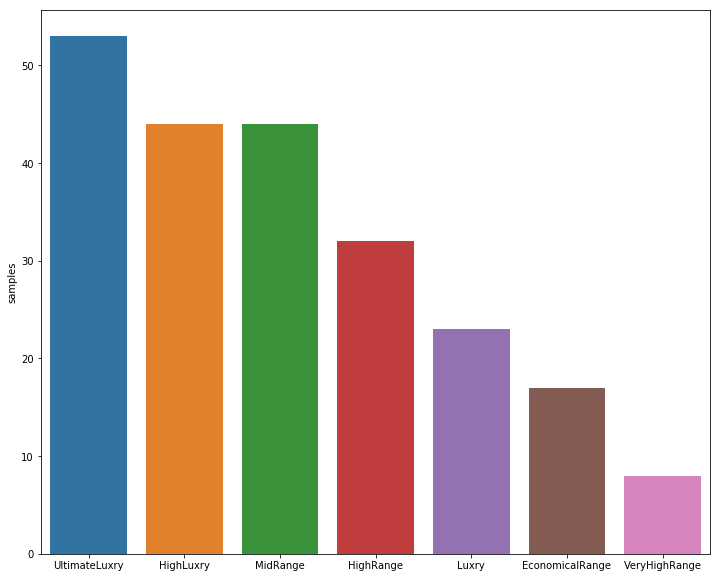

In [13]:
# value count plot
x=data.segment.value_counts()
plt.figure(figsize=(12,10))
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [14]:
data['soup'] = data['body_type'] + ' ' + data['segment']
data['soup'][ : 10]

0    Hatchback EconomicalRange
1    Hatchback EconomicalRange
2    Hatchback EconomicalRange
3     Minivans EconomicalRange
4    Hatchback EconomicalRange
5    Hatchback EconomicalRange
6    Hatchback EconomicalRange
7    Hatchback EconomicalRange
8           Hatchback MidRange
9           Hatchback MidRange
Name: soup, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['soup'])

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)
sim_scores = list(enumerate(cosine_sim[21]))
sim_scores[ : 10]

[(0, 0.4999999999999999),
 (1, 0.4999999999999999),
 (2, 0.4999999999999999),
 (3, 0.0),
 (4, 0.4999999999999999),
 (5, 0.4999999999999999),
 (6, 0.4999999999999999),
 (7, 0.4999999999999999),
 (8, 0.9999999999999998),
 (9, 0.9999999999999998)]

In [17]:
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores[ : 10]

[(8, 0.9999999999999998),
 (9, 0.9999999999999998),
 (17, 0.9999999999999998),
 (18, 0.9999999999999998),
 (21, 0.9999999999999998),
 (23, 0.9999999999999998),
 (29, 0.9999999999999998),
 (37, 0.9999999999999998),
 (38, 0.9999999999999998),
 (41, 0.9999999999999998)]

In [18]:
data = data.reset_index()
indices = pd.Series(data.index, index=data['model_name'])
indices[ : 10]

model_name
Alto 800     0
Alto K10     1
S-Presso     2
Eeco         3
Celerio      4
Wagon R      5
Ignis        6
Celerio X    7
Swift        8
Baleno       9
dtype: int64

In [19]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [score[0] for score in sim_scores]
    similarity = [score[1] for score in sim_scores]    
    recommendationDf = pd.DataFrame({'model':data['model_name'].iloc[movie_indices], 'similarity':similarity})
    return recommendationDf

In [20]:
get_recommendations('Creta', cosine_sim)

,model,similarity
25,Creta,1.0
30,WRV,1.0
31,BRV,1.0
46,Safari Storme,1.0
47,Harrier,1.0
54,XUV300,1.0
55,TUV 300,1.0
57,Thar,1.0
58,TUV 300 Plus,1.0
60,Scorpio,1.0


In [21]:
get_recommendations('Alto K10', cosine_sim)

,model,similarity
1,Alto K10,1.0
2,S-Presso,1.0
4,Celerio,1.0
5,Wagon R,1.0
6,Ignis,1.0
7,Celerio X,1.0
16,Santro,1.0
36,Tiago,1.0
49,KUV100 NXT,1.0
63,KWID,1.0
